## Merge of the dataset of oscar and movies budet/popu/rating 

the_oscar_award.csv comes from:  https://www.kaggle.com/datasets/unanimad/the-oscar-award
movie_stat.csv comes from : https://github.com/danielgrijalva/movie-stats/blob/master/movies.csv

In [2]:
import pandas as pd

In [3]:
# oscars dataset : drop useless columns, change name to match the other datasets, keep only 4 categories of nominations
oscars = pd.read_csv('data/the_oscar_award.csv')
oscars = oscars[oscars['category'].str.contains('ACTOR|ACTOR IN A SUPPORTING ROLE|ACTRESS|ACTRESS IN A SUPPORTING ROLE|DIRECTING', regex=True)]
oscars.rename(columns={'film': 'movie_name'}, inplace=True)
oscars.rename(columns={'year_film': 'Movie release date'}, inplace=True)

oscars['movie_name'] = oscars['movie_name'].str.lower().str.replace(' ', '_')

oscars

,Movie release date,year_ceremony,ceremony,category,name,movie_name,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,the_noose,False
1,1927,1928,1,ACTOR,Emil Jannings,the_last_command,True
2,1927,1928,1,ACTRESS,Louise Dresser,a_ship_comes_in,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th_heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,sadie_thompson,False
...,...,...,...,...,...,...,...
10800,2023,2024,96,DIRECTING,Justine Triet,anatomy_of_a_fall,False
10801,2023,2024,96,DIRECTING,Martin Scorsese,killers_of_the_flower_moon,False
10802,2023,2024,96,DIRECTING,Christopher Nolan,oppenheimer,True
10803,2023,2024,96,DIRECTING,Yorgos Lanthimos,poor_things,False


In [4]:
# need to have only one row per movie: addition of a 'num_nominations' column to count the number of nominations per movie, 
# and a 'winner' column to know if the movie won the category and by who --> will be matched with the actors we are interested in

oscars_to_merge = oscars.groupby(['movie_name'], as_index=False).agg({
    'Movie release date': 'first',
    'category': lambda x: ', '.join(f"{cat}: {name}" for cat, name in zip(x, oscars.loc[x.index, 'name'])),
    'winner': lambda x: ', '.join(oscars.loc[x.index, 'name'][oscars.loc[x.index, 'winner']]),
    'category': 'count'
}).rename(columns={'category': 'num_nominations'})

oscars_to_merge['winner'].value_counts()

winner
                            933
Walter Brennan                3
Katharine Hepburn             3
Ingrid Bergman                3
Alfonso Cuarón                2
                           ... 
Joaquin Phoenix               1
Van Heflin                    1
Jane Wyman                    1
Bette Davis, Fay Bainter      1
Lila Kedrova                  1
Name: count, Length: 337, dtype: int64

In [5]:
# tmdb dataset : drop useless columns, change name to match the other datasets

#data_tmdb = pd.read_csv('data/movie_data_tmbd.csv', sep='|')
#data_tmdb.drop(['adult', 'id', 'imdb_id', 'backdrop_path', 'belongs_to_collection', 'genres', 'homepage', 'original_language', 'original_title', 'overview', 'runtime', 'spoken_languages', 'video', 'poster_path', 'production_companies', 'production_countries', 'tagline', 'cast'], axis=1, inplace=True)

#data_tmdb.rename(columns={'revenue': 'revenue_tmdb'}, inplace=True)
#data_tmdb.rename(columns={'title': 'movie_name'}, inplace=True)
#data_tmdb.rename(columns={'release_date': 'Movie release date'}, inplace=True)

#data_tmdb['movie_name'] = data_tmdb['movie_name'].str.lower().str.replace(' ', '_')



In [6]:
movie_stats = pd.read_csv('data/movie_stats.csv')
movie_stats.rename(columns={'name': 'movie_name'}, inplace=True)
movie_stats.rename(columns={'year': 'Movie release date'}, inplace=True)
movie_stats['movie_name'] = movie_stats['movie_name'].str.lower().str.replace(' ', '_')

def convert_to_datetime(date):
    # Check if the date is just a year (4 digits) and convert it to 'yyyy-01-01' format
    if len(str(date)) == 4 and str(date).isdigit():  # Only year (e.g., 1988)
        return pd.to_datetime(str(date) + '-01-01')
    else:
        return pd.to_datetime(date, errors='coerce')  # Convert if it's in a full date format

movie_stats['Movie release date'] = movie_stats['Movie release date'].apply(convert_to_datetime)
movie_stats['Movie release date'] = movie_stats['Movie release date'].dt.year

movie_stats


,movie_name,rating,genre,Movie release date,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,the_shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,the_blue_lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,star_wars:_episode_v_-_the_empire_strikes_back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,more_to_life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,dream_round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,saving_mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,it's_just_us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [7]:
# CMU Movie dataset : kept all columns, change name to match the other datasets

original_data = pd.read_csv('data/movie.metadata.tsv', sep='\t', names= ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres'])
original_data.rename(columns={'Movie name': 'movie_name'}, inplace=True)

original_data['movie_name'] = original_data['movie_name'].str.lower().str.replace(' ', '_')

original_data['Movie release date'] = original_data['Movie release date'].apply(convert_to_datetime)
original_data['Movie release date'] = original_data['Movie release date'].dt.year

original_data

,Wikipedia movie ID,Freebase movie ID,movie_name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,ghosts_of_mars,2001.0,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,getting_away_with_murder:_the_jonbenét_ramsey_...,2000.0,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,brun_bitter,1988.0,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,white_of_the_eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,a_woman_in_flames,1983.0,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,mermaids:_the_body_found,2011.0,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,knuckle,2011.0,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,another_nice_mess,1972.0,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,the_super_dimension_fortress_macross_ii:_lover...,1992.0,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [8]:
# merged original and movie stats 

merged = pd.merge(original_data, movie_stats, on=['movie_name', 'Movie release date'], how='left')
final_merged_data = merged.merge(oscars_to_merge, on=['movie_name', 'Movie release date'], how='left')

final_merged_data
final_merged_data.to_csv('data/final_merged_data.csv', index=False)

## Creation of the criteria for rating **film success**



In [9]:
final_merged_data.dtypes

Wikipedia movie ID            int64
Freebase movie ID            object
movie_name                   object
Movie release date          float64
Movie box office revenue    float64
Movie runtime               float64
Movie languages              object
Movie countries              object
Movie genres                 object
rating                       object
genre                        object
released                     object
score                       float64
votes                       float64
director                     object
writer                       object
star                         object
country                      object
budget                      float64
gross                       float64
company                      object
runtime                     float64
num_nominations             float64
winner                       object
dtype: object

In [13]:
# Create a copy of data and cle
clean_df = final_merged_data.dropna(subset=['Movie box office revenue', 'budget', 'score', 'votes']).copy()

clean_df['budget'] = pd.to_numeric(clean_df['budget'])

# Calculate ratio
clean_df['revenue_to_budget_ratio'] = clean_df['Movie box office revenue'] / clean_df['budget']


clean_df[['movie_name', 'Movie genres', 'score','votes','Movie box office revenue', 'budget', 'revenue_to_budget_ratio', 'winner' ]].sort_values(by='revenue_to_budget_ratio', ascending = False)

## Clean dataset with the criteria we want for the moment .

,movie_name,Movie genres,score,votes,Movie box office revenue,budget,revenue_to_budget_ratio,winner
33438,the_blair_witch_project,"{""/m/03npn"": ""Horror"", ""/m/0219x_"": ""Indie"", ""...",6.5,239000.0,248639099.0,60000.0,4143.984983,NaN
67652,el_mariachi,"{""/m/01jfsb"": ""Thriller"", ""/m/03btsm8"": ""Actio...",6.9,64000.0,2040920.0,7000.0,291.560000,NaN
29206,napoleon_dynamite,"{""/m/0219x_"": ""Indie"", ""/m/01hwc6"": ""Absurdism...",6.9,204000.0,46118099.0,400000.0,115.295248,NaN
31667,in_the_company_of_men,"{""/m/0vgkd"": ""Black comedy"", ""/m/07s9rl0"": ""Dr...",7.2,13000.0,2856622.0,25000.0,114.264880,NaN
24914,keeping_mum,"{""/m/0vgkd"": ""Black comedy"", ""/m/01z4y"": ""Come...",6.8,34000.0,18575768.0,169000.0,109.915787,NaN
...,...,...,...,...,...,...,...,...
76987,the_boondock_saints,"{""/m/0hn10"": ""LGBT"", ""/m/01jfsb"": ""Thriller"", ...",7.8,230000.0,30471.0,6000000.0,0.005078,NaN
58128,best_laid_plans,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",6.1,7400.0,27816.0,7000000.0,0.003974,NaN
49848,rock_&_rule,"{""/m/04t36"": ""Musical"", ""/m/06n90"": ""Science F...",6.5,3400.0,30379.0,8000000.0,0.003797,NaN
19093,dangerous_game,"{""/m/07s9rl0"": ""Drama"", ""/m/0219x_"": ""Indie""}",5.6,3600.0,23671.0,10000000.0,0.002367,NaN


In [11]:
clean_df.loc[clean_df['movie_name'] == 'avatar']['revenue_to_budget_ratio']

23702    11.739558
Name: revenue_to_budget_ratio, dtype: float64

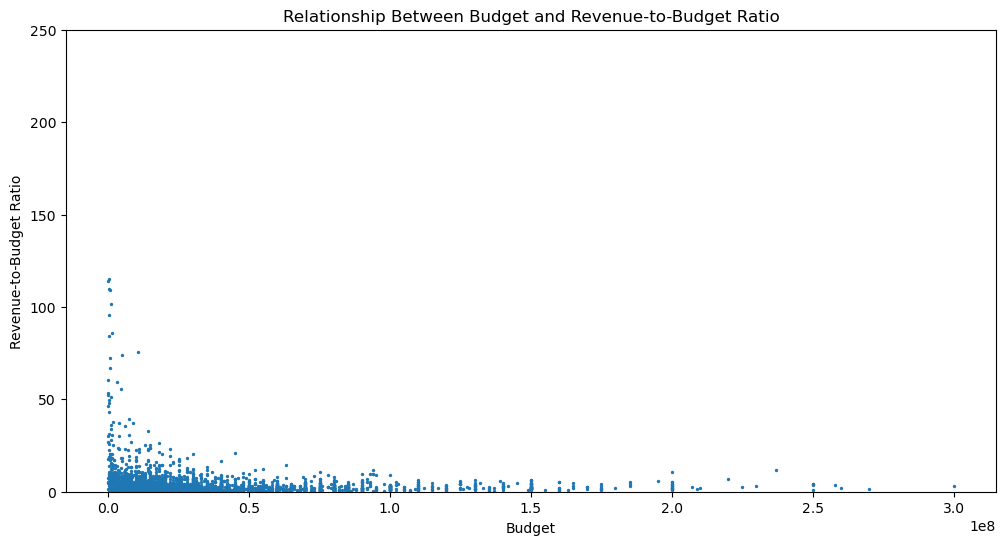

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(clean_df['budget'], clean_df['revenue_to_budget_ratio'], s = 2)
plt.ylim((0, 250))
plt.xlabel('Budget')
plt.ylabel('Revenue-to-Budget Ratio')
plt.title('Relationship Between Budget and Revenue-to-Budget Ratio')
plt.show()

In [ ]:
clean_df

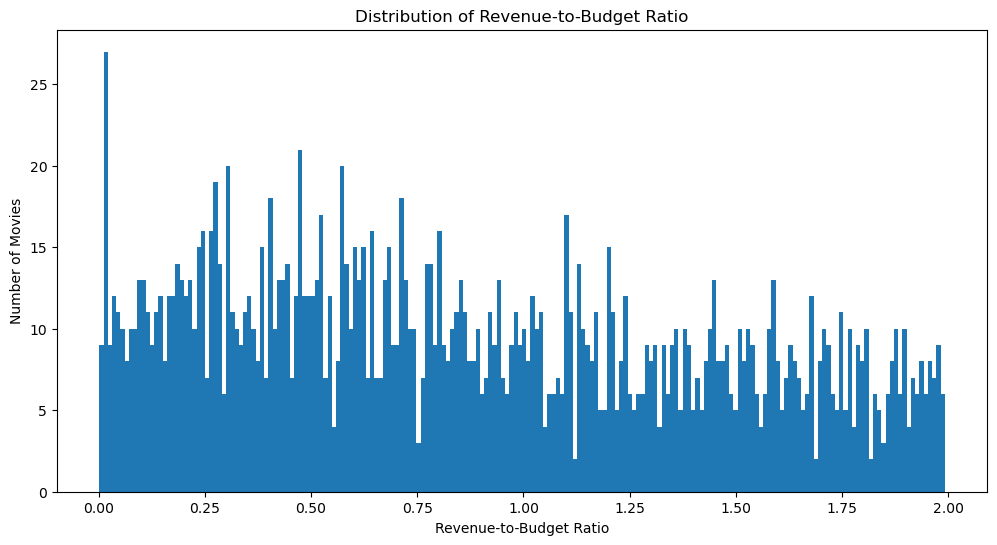

In [30]:
import matplotlib.pyplot as plt

# Assuming your data is in the 'clean_df' dataframe
plot_df = clean_df.loc[clean_df['revenue_to_budget_ratio'] < 2] 
plt.figure(figsize=(12, 6))
plt.hist(plot_df['revenue_to_budget_ratio'], bins=200)

plt.xlabel('Revenue-to-Budget Ratio')
plt.ylabel('Number of Movies')
plt.title('Distribution of Revenue-to-Budget Ratio')
plt.show()